# K-means clustering: using "sklearn" and sythetic data

The notebook aims to study and implement a k-means clustering using "sklearn". A synthetic dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [1]:
# Define where you are running the code: colab or local
RunInColab          = False     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = "C:/Users/Ana del Rosal/Documents/School/semanaTec/TC1002S/"

In [2]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [3]:
# Dataset url
url = Ruta + "NotebooksProfessor/datasets/iris/iris.csv"

# Load the dataset
df = pd.read_csv(url, header=None)
df.columns =['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'FlowerName']


# En caso de querer eliminar el nombre y mostrar el puro valor categorico
df.drop("FlowerName", axis=1, inplace = True)

df



,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [4]:
# Print the dataframe
df

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
# get the number of observations and variables
df.shape

print("Observations: ", df.shape[0])
print("Variables: ", df.shape[1])

Observations:  150
Variables:  4


2. Drop rows with any missing values


In [6]:
# Drop rows with NaN values if existing
df.dropna()

# Print the new shape
print(df.shape)

(150, 4)


3. Scatterplot




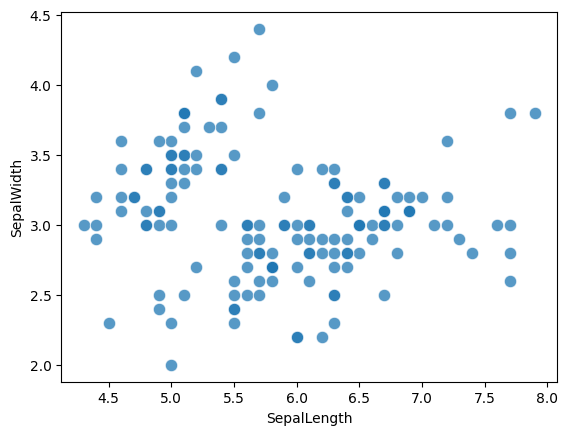

In [7]:
# Scatterplot of x1 and x2
sns.scatterplot(data=df, x="SepalLength", y="SepalWidth", s=80, alpha=0.75)
plt.show()

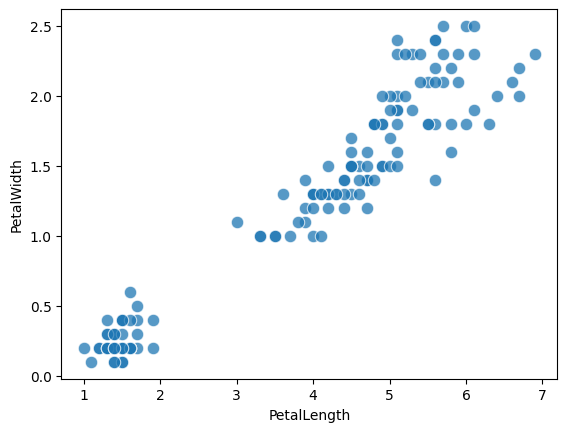

In [8]:
# Scatterplot of x1 and x3
sns.scatterplot(data=df, x="PetalLength", y="PetalWidth", s=80, alpha=0.75)
plt.show()

Difficult to plot independetly all combinations, let's use pairplot

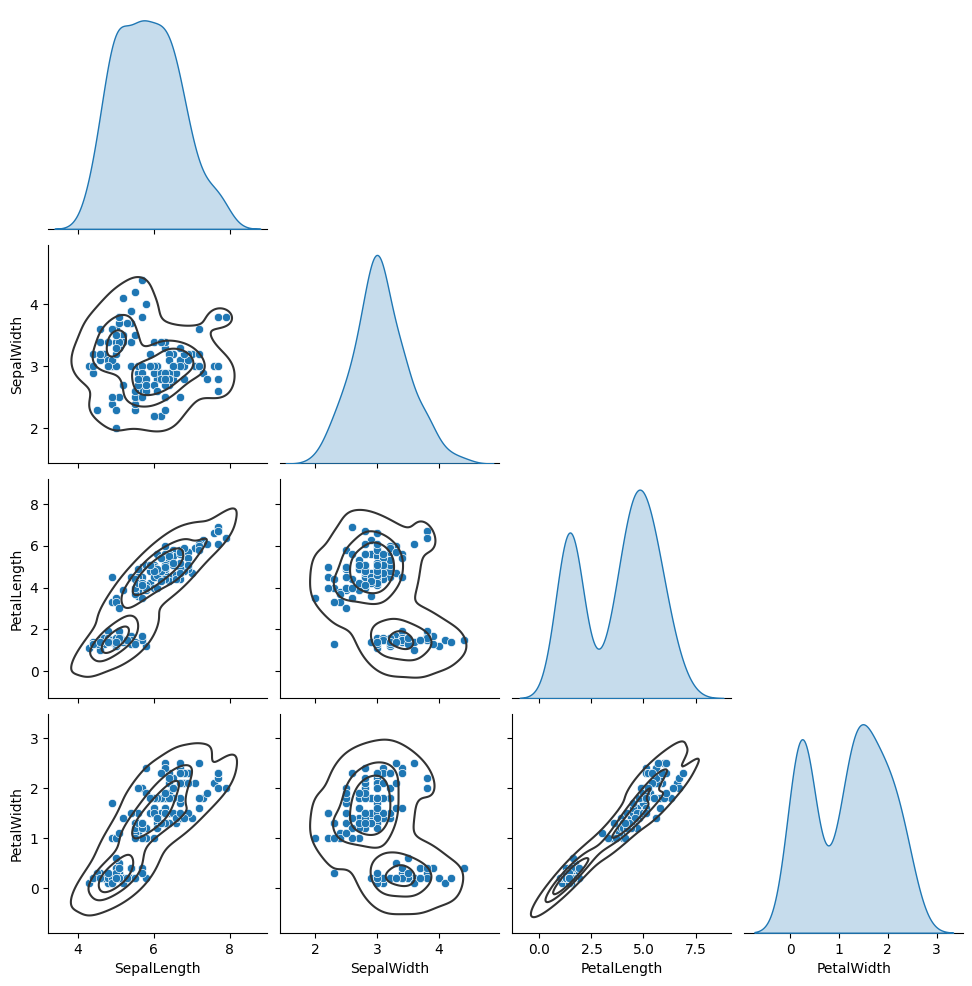

In [9]:
# Pairplot: Scatterplot of all variables
g = sns.pairplot(df, corner =True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

It looks like there are 3 or 4 clusters/groups

Note that we do not know in advance the class/cluster/group to which each point belongs to: we need to apply unsupervised learning ¡

# Kmeans clustering

Kmeans clustering

In [10]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K  = 3 # Let's assume there are 2,3,4,5...? clusters/groups

# Create/Initialize the Kmeans box/object
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(df)
#yestimated = km.fit_predict(df[['PetalLength','PetalWidth']] )
#yestimated = km.fit_predict(df[['x1','x3']] )

# Print estimated cluster of each point in the dataset
yestimated

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [11]:
# Add a new column to the dataset with the cluster information
df['yestimated'] = yestimated

df

,SepalLength,SepalWidth,PetalLength,PetalWidth,yestimated
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [12]:
# Print the Labels/Names of the existing clusters
df.yestimated.unique()

array([1, 0, 2])

In [13]:
# Cluster centroides
km.cluster_centers_


array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [14]:
# Sum of squared error (sse) of the final model
km.inertia_

78.8556658259773

In [15]:
# The number of iterations required to converge
km.n_iter_

5

# <span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Compute the number of points in each cluster

In [16]:
# Get a dataframe with the data of each clsuter
df0 = df[df.yestimated==0]
df1 = df[df.yestimated==1]
df2 = df[df.yestimated==2]

# Number of points in cluster 0
NpointsCluster0 = df0.shape[0]
NpointsCluster1 = df1.shape[0]
NpointsCluster2 = df2.shape[0]

# Print
print("Number of points in clusters 0: " + str(NpointsCluster0) )
print("Number of points in clusters 1: " + str(NpointsCluster1) )
print("Number of points in clusters 02: " + str(NpointsCluster2) )

# Print total number of points
print("Total Number of points in the clusters: " + str(NpointsCluster0+NpointsCluster1+NpointsCluster2) )

Number of points in clusters 0: 39
Number of points in clusters 1: 50
Number of points in clusters 02: 61
Total Number of points in the clusters: 150


# Plot estimated clusters

Plot estimated clusters

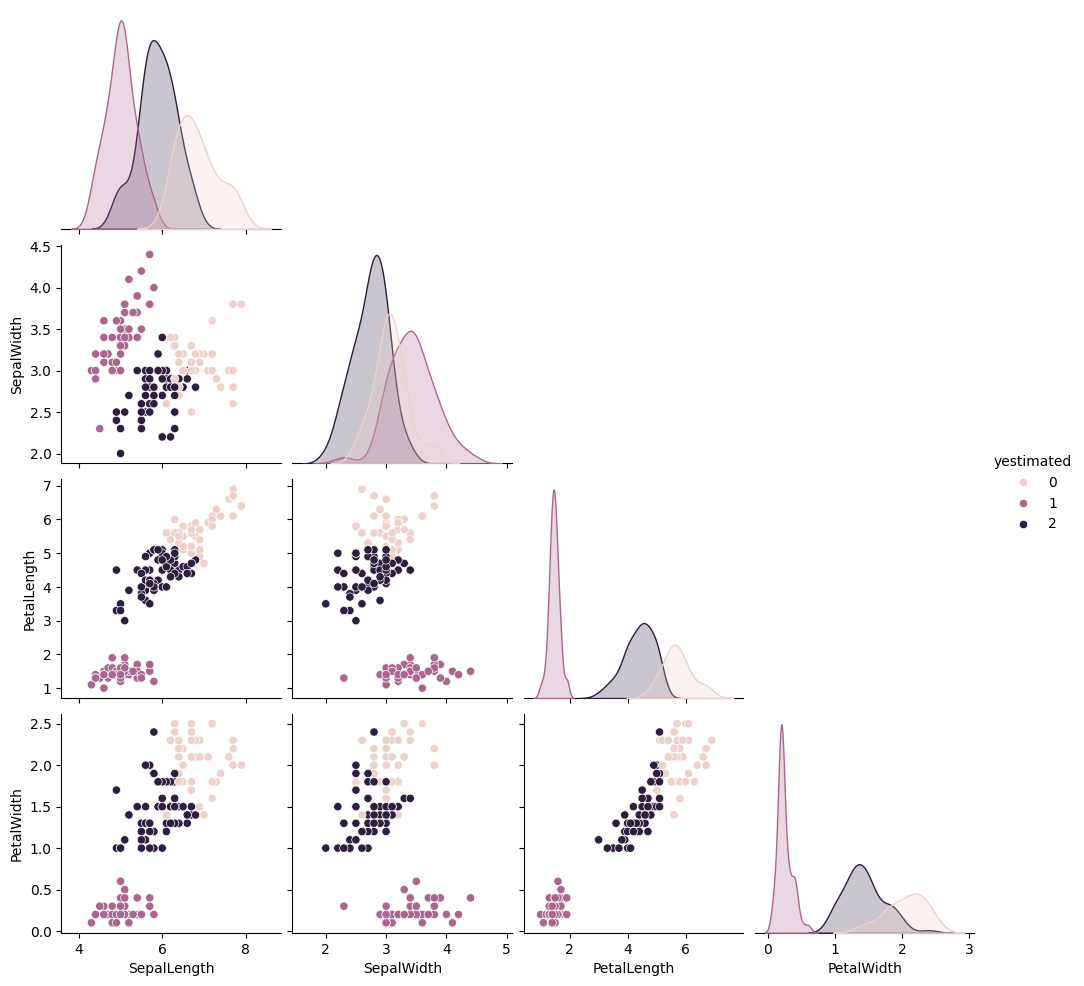

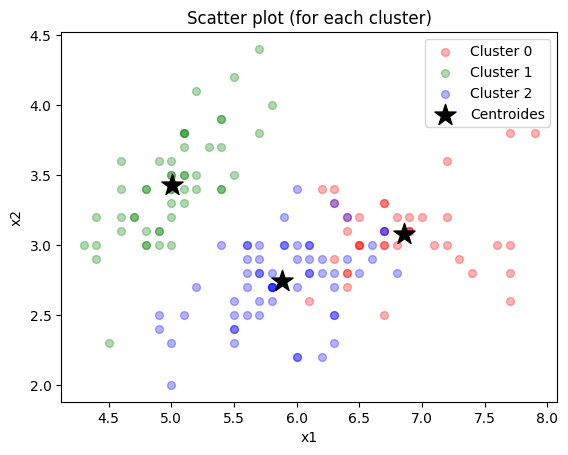

In [17]:
# Get a dataframe with the data of each clsuter
df1 = df[df.yestimated==0]
df2 = df[df.yestimated==1]
df3 = df[df.yestimated==2]


# Scatter plot of each cluster
g = sns.pairplot(df, corner =True, diag_kind="kde", kind ="scatter", hue='yestimated')
plt.show()


plt.scatter(df1.SepalLength, df1.SepalWidth, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2.SepalLength, df2.SepalWidth, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df3.SepalLength, df3.SepalWidth, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)


# Plot centrodides
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()



# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [18]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(df[['SepalLength','SepalWidth']])
    # Save sse for each k
    sse.append(km.inertia_)


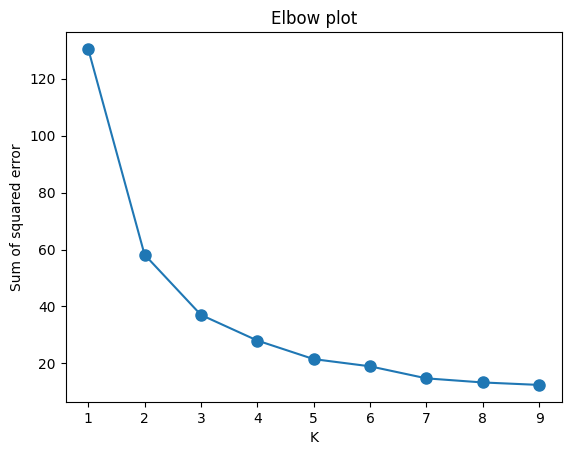

In [19]:
# Plot sse versus k
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

Choose the k after which the sse is minimally reduced


<span style='color:Blue'> **Important remarks**  </span>

- Observations?



# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity: 

1. Repeat this analysis using other pair of features, e.g., x3 and x6

2. Repeat this analysis using all six features, e.g., x1, x2,..., x6

3. Provide conclusions

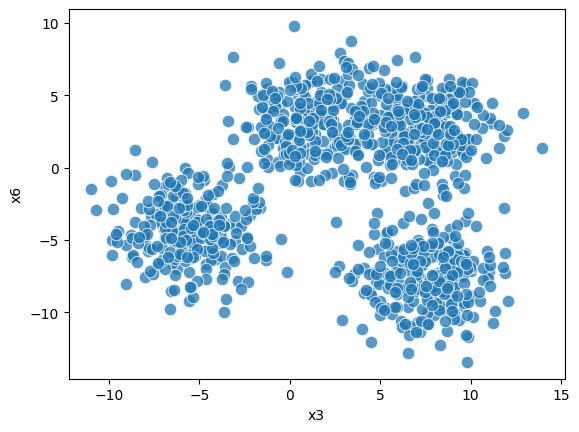

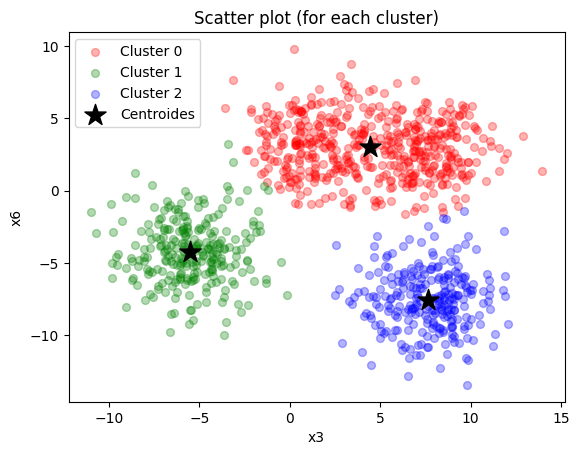

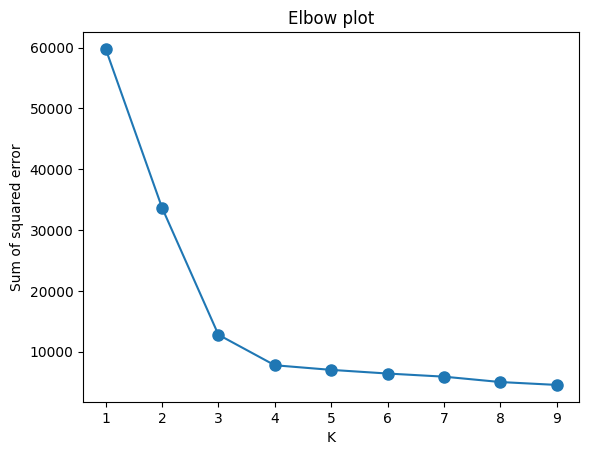

In [20]:
# 1. Repeat this analysis using other pair of features, e.g., x3 and x6

url = Ruta + "NotebooksProfessor/datasets/SyntheticData4Clustering_X.csv"
df  = pd.read_csv(url)

sns.scatterplot(data=df, x="x3", y="x6", s=80, alpha=0.75)
plt.show()


# Define number of clusters
K  = 3 

# Create/Initialize the Kmeans box/object
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(df[['x3','x6']] )

# Add a new column to the dataset with the cluster information
df['yestimated'] = yestimated

# Get a dataframe with the data of each clsuter
df1 = df[df.yestimated==0]
df2 = df[df.yestimated==1]
df3 = df[df.yestimated==2]

# Scatter plot of each cluster
plt.scatter(df1.x3, df1.x6, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2.x3, df2.x6, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df3.x3, df3.x6, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('x3')
plt.ylabel('x6')
plt.legend()
plt.show()

# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(df[['x3','x6']])
    # Save sse for each k
    sse.append(km.inertia_)

# Plot sse versus k
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()


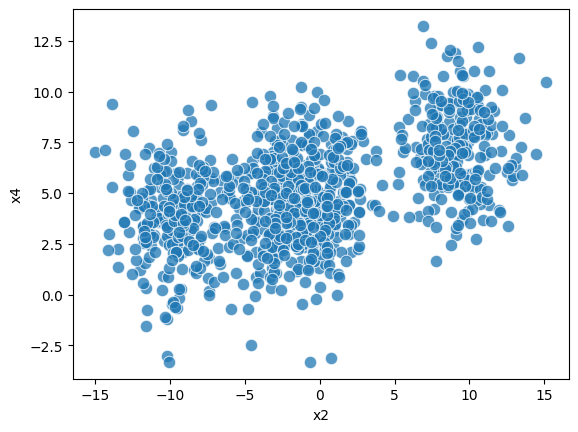

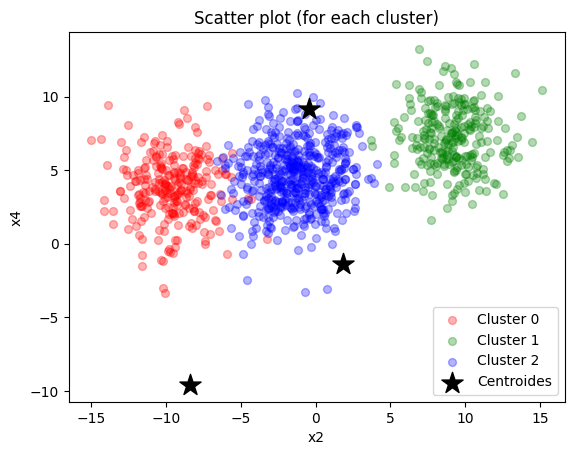

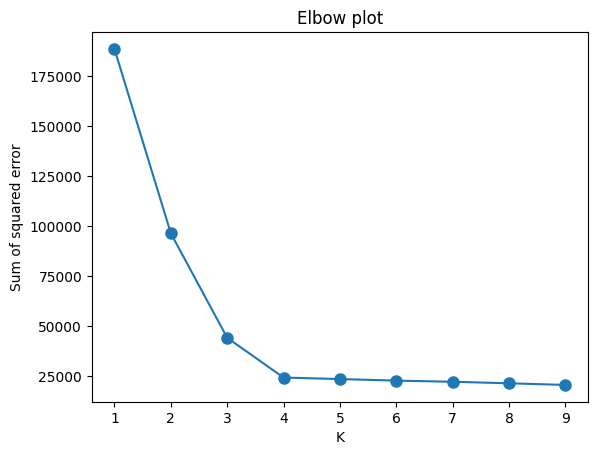

In [21]:
# 2. Repeat this analysis using all six features, e.g., x1, x2,..., x6

url = Ruta + "NotebooksProfessor/datasets/SyntheticData4Clustering_X.csv"
df  = pd.read_csv(url)

sns.scatterplot(data=df, x="x2", y="x4", s=80, alpha=0.75)
plt.show()


# Define number of clusters
K  = 3 

# Create/Initialize the Kmeans box/object
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(df)

# Add a new column to the dataset with the cluster information
df['yestimated'] = yestimated

# Get a dataframe with the data of each clsuter
df1 = df[df.yestimated==0]
df2 = df[df.yestimated==1]
df3 = df[df.yestimated==2]

# Scatter plot of each cluster
plt.scatter(df1.x2, df1.x4, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2.x2, df2.x4, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df3.x2, df3.x4, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('x2')
plt.ylabel('x4')
plt.legend()
plt.show()

# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(df)
    # Save sse for each k
    sse.append(km.inertia_)

# Plot sse versus k
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()


### 3. Provide conclusions

Podemos ver que al hacer el cluster considerando las 6 variables, si ponemos 3 centroides, estos no reflejan un punto central al hacer un scatter plot comparando x2 y x4. 
No obstante al realizar un cluster con solo x1 y x3, si graficamos los 3 centroides y los comparamos con su respectivo scatter plot, veremos que si se encuentran en la posición esperada.
Podemos observar este fenómeno en las graficas de sse, donde el error es mucho mayor al considerar todas las variables.

# Activity: work with the iris dataset

    
1. Do clustering with the iris flower dataset to form clusters using as features the four features

2. Do clustering with the iris flower dataset to form clusters using as features the two petal measurements: Drop out the other two features

3. Do clustering with the iris flower dataset to form clusters using as features the two sepal measurements: Drop out the other two features

4. Which one provides the better grouping? Solve this using programming skills, e.g., compute performance metrics


### 1. Do clustering with the iris flower dataset to form clusters using as features the four features

In [29]:
# Dataset url
url = Ruta + "NotebooksProfessor/datasets/iris/iris.csv"

# Load the dataset
df = pd.read_csv(url, header=None)
df.columns =['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'FlowerName']
df.drop("FlowerName", axis=1, inplace = True)

# Define number of clusters
K  = 3 



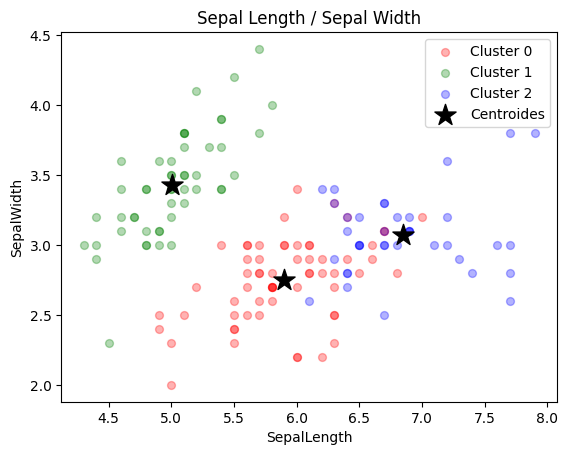

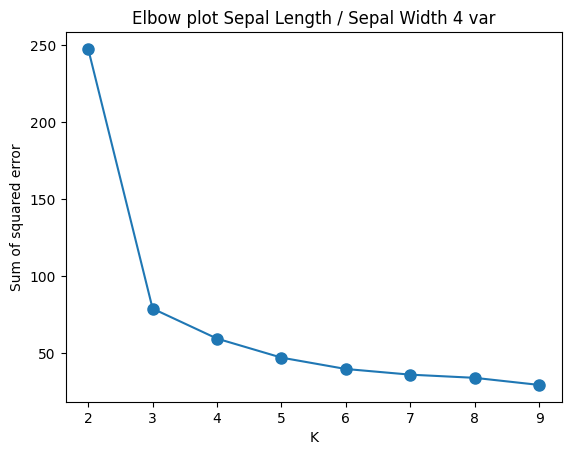

In [31]:
# Create/Initialize the Kmeans box/object
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(df)

# Add a new column to the dataset with the cluster information
df['yestimated'] = yestimated

# Get a dataframe with the data of each clsuter
df0 = df[df.yestimated==0]
df1 = df[df.yestimated==1]
df2 = df[df.yestimated==2]

# Plot clusters + centrodides
plt.scatter(df0.SepalLength, df0.SepalWidth, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df1.SepalLength, df1.SepalWidth, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df2.SepalLength, df2.SepalWidth, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Sepal Length / Sepal Width')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()
plt.show()

# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(2,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(df)
    # Save sse for each k
    sse.append(km.inertia_)

# Plot sse versus k
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Elbow plot Sepal Length / Sepal Width 4 var')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()


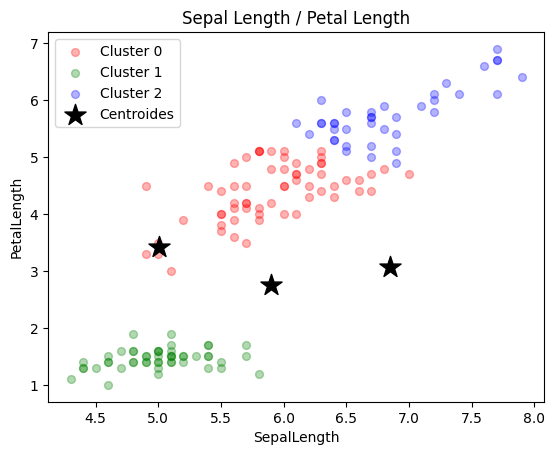

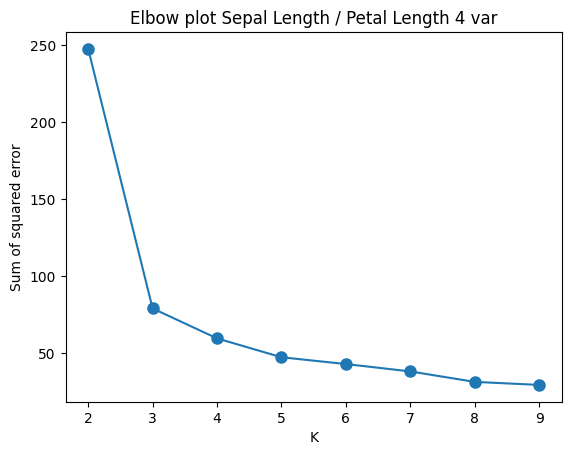

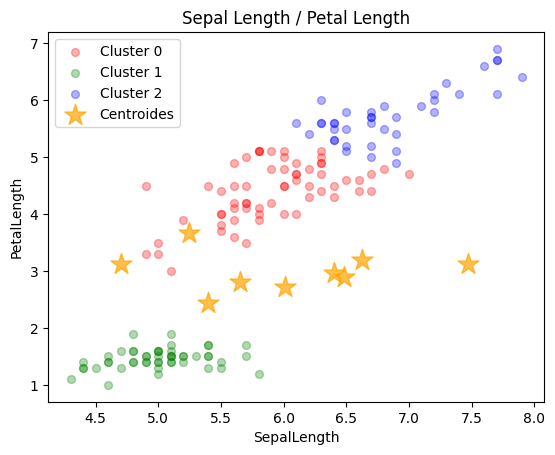

In [32]:
# Create/Initialize the Kmeans box/object
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(df)

# Add a new column to the dataset with the cluster information
df['yestimated'] = yestimated

# Get a dataframe with the data of each clsuter
df0 = df[df.yestimated==0]
df1 = df[df.yestimated==1]
df2 = df[df.yestimated==2]

# Plot clusters + centrodides
plt.scatter(df0.SepalLength, df0.PetalLength, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df1.SepalLength, df1.PetalLength, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df2.SepalLength, df2.PetalLength, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Sepal Length / Petal Length')
plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.legend()
plt.show()

# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(2,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(df)
    # Save sse for each k
    sse.append(km.inertia_)

# Plot sse versus k
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Elbow plot Sepal Length / Petal Length 4 var')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

# Plot clusters + centrodides
plt.scatter(df0.SepalLength, df0.PetalLength, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df1.SepalLength, df1.PetalLength, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df2.SepalLength, df2.PetalLength, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='orange', marker='*', label='Centroides', s=255, alpha = 0.7)


plt.title('Sepal Length / Petal Length')
plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.legend()
plt.show()



### 2. Do clustering with the iris flower dataset to form clusters using as features the two petal measurements: Drop out the other two features


In [25]:
# Dataset url
url = Ruta + "NotebooksProfessor/datasets/iris/iris.csv"

# Load the dataset
df = pd.read_csv(url, header=None)
df.columns =['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'FlowerName']
df.drop("FlowerName", axis=1, inplace = True)

# Define number of clusters
K  = 3 

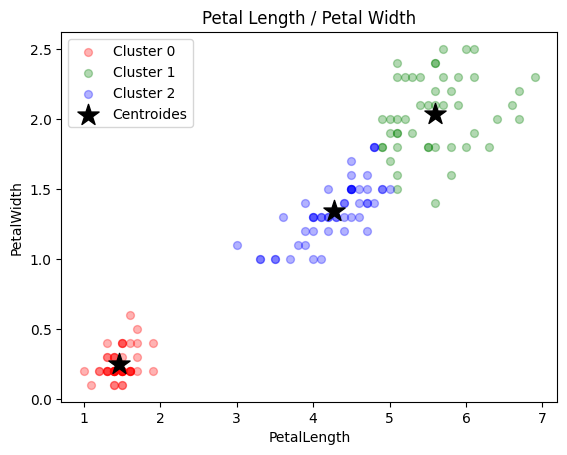

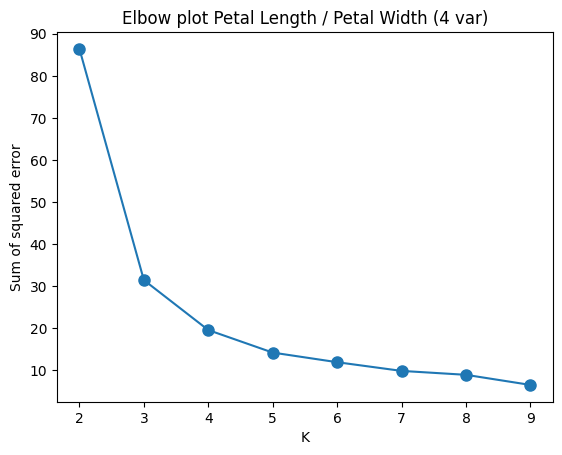

In [26]:
# Create/Initialize the Kmeans box/object
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(df[["PetalLength", "PetalWidth"]])

# Add a new column to the dataset with the cluster information
df['yestimated'] = yestimated

# Get a dataframe with the data of each clsuter
df0 = df[df.yestimated==0]
df1 = df[df.yestimated==1]
df2 = df[df.yestimated==2]

# Plot clusters + centrodides
plt.scatter(df0.PetalLength, df0.PetalWidth, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df1.PetalLength, df1.PetalWidth, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df2.PetalLength, df2.PetalWidth, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Petal Length / Petal Width')
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.legend()
plt.show()

# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(2,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(df[['PetalLength','PetalWidth']])
    # Save sse for each k
    sse.append(km.inertia_)

# Plot sse versus k
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Elbow plot Petal Length / Petal Width (4 var)')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()


### 3. Do clustering with the iris flower dataset to form clusters using as features the two sepal measurements: Drop out the other two features


In [27]:
# Dataset url
url = Ruta + "NotebooksProfessor/datasets/iris/iris.csv"

# Load the dataset
df = pd.read_csv(url, header=None)
df.columns =['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'FlowerName']
df.drop("FlowerName", axis=1, inplace = True)

# Define number of clusters
K  = 3 

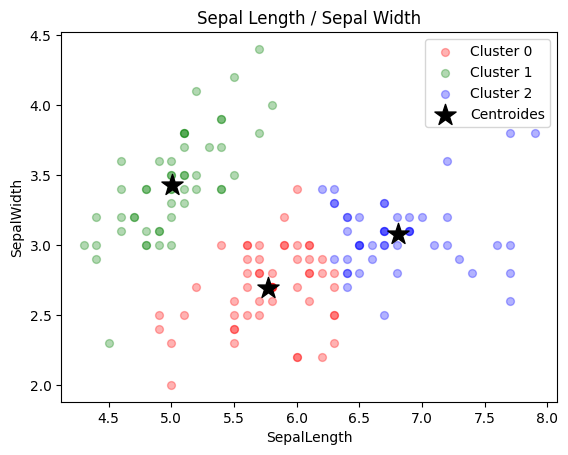

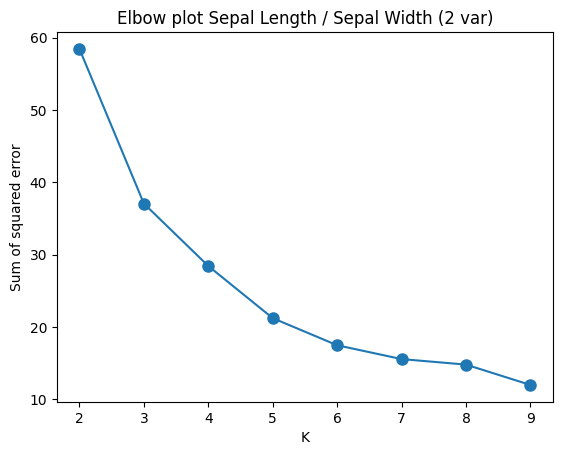

In [28]:
# Create/Initialize the Kmeans box/object
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(df[["SepalLength", "SepalWidth"]])

# Add a new column to the dataset with the cluster information
df['yestimated'] = yestimated

# Get a dataframe with the data of each clsuter
df0 = df[df.yestimated==0]
df1 = df[df.yestimated==1]
df2 = df[df.yestimated==2]

# Plot clusters + centrodides
plt.scatter(df0.SepalLength, df0.SepalWidth, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df1.SepalLength, df1.SepalWidth, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df2.SepalLength, df2.SepalWidth, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Sepal Length / Sepal Width')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()
plt.show()

# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(2,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(df[['SepalLength','SepalWidth']])
    # Save sse for each k
    sse.append(km.inertia_)

# Plot sse versus k
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Elbow plot Sepal Length / Sepal Width (2 var)')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()


### 4. Which one provides the better grouping? Solve this using programming skills, e.g., compute performance metrics


#### Observaciones

- Al considerar un mayor numero de variables al momento de assignar un punto a un cluster (K-means clustering), puede que los centroides no reflejen la información correcta al momento de graficar. Esto se debe a que las graficas realizadas consideran solo dos variables, mientras que los centroides se basan en 4.

Podemos ver este fenómeno en las siguientes graficas:

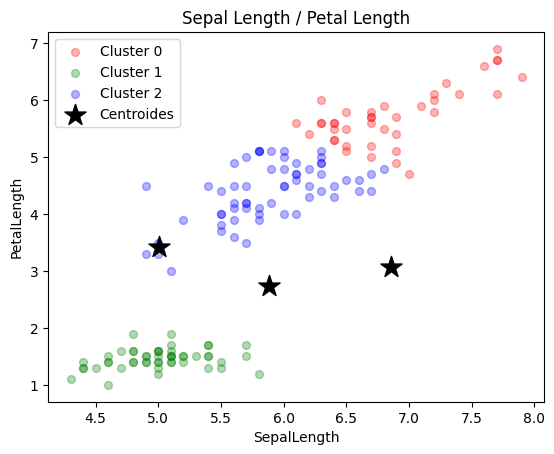 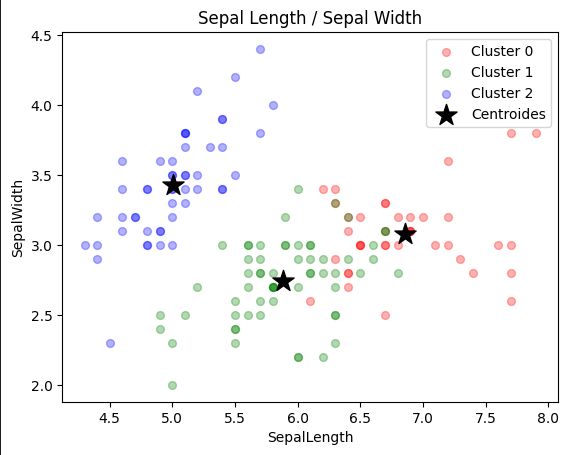

En el primer caso los centroides no se encuentran en una posición central, mientras que en la segunda gráfica si.

- Para el clustering de 4 var y 2 var podemos observar que los clusters tienen un sse distinto al terminar las iteraciones. Es importante destacar que el propósito es encontrar el menor sse con la menor cantidad de clusters.

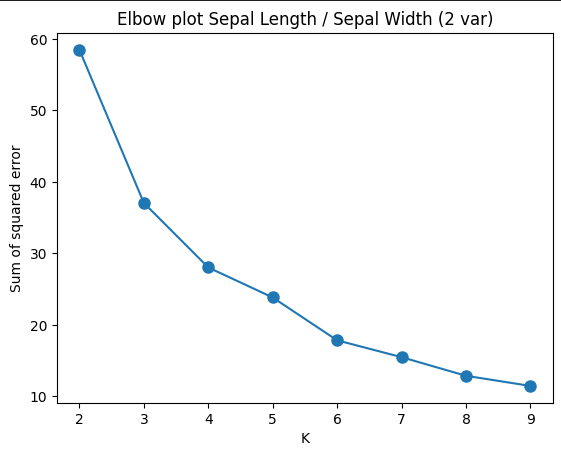 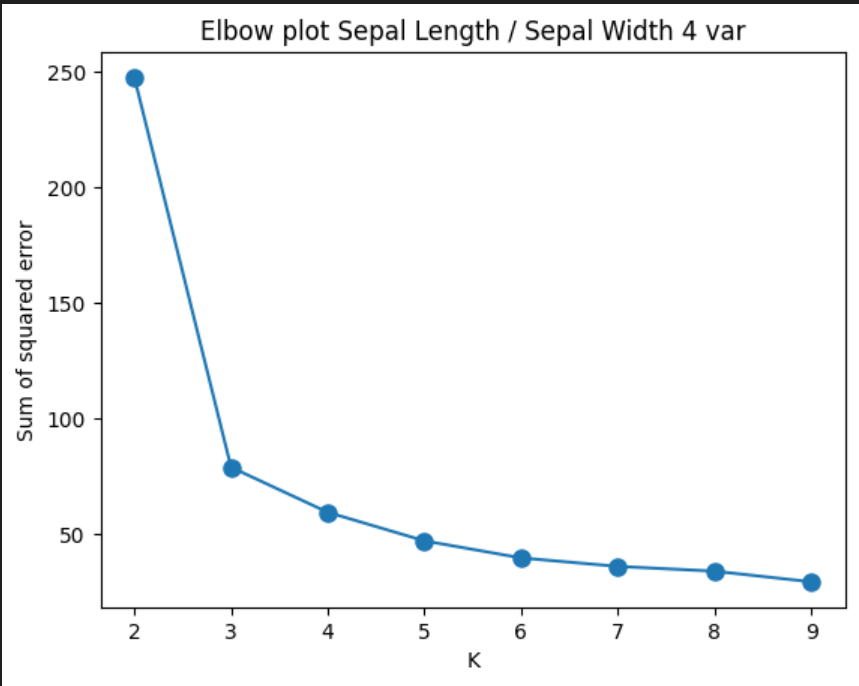 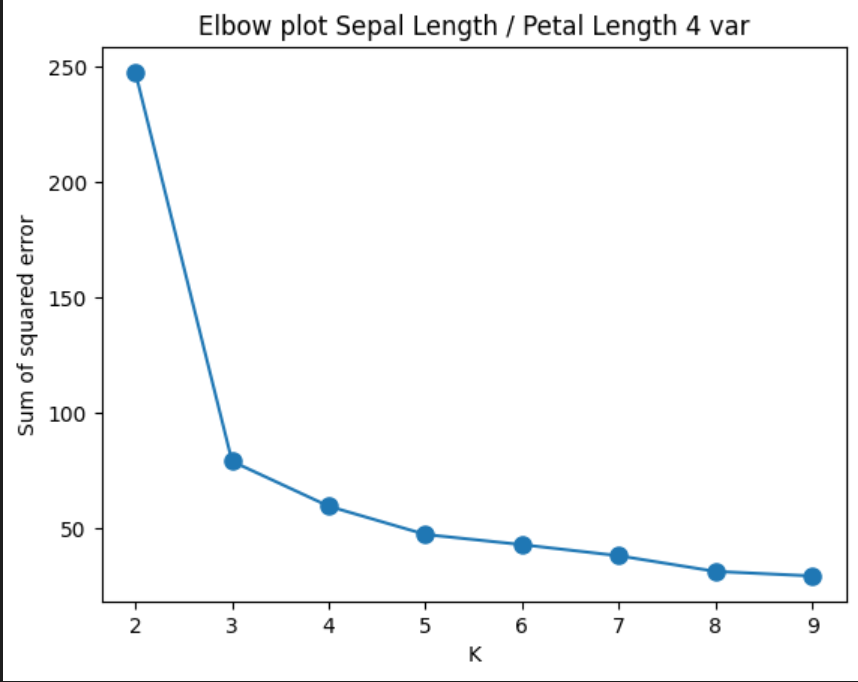

Al observar todas las graficas, podemos ver que el error al utilizar 3 clusters es mucho mayor cuando se consideran todas las variables.

- En todos los ejercicios el punto de inflexión en las gráficas de sse es entre 3 y 4 clusters, teniendo un error menor las que su clustering fue realizado solo con 2 var.


#### Conclusion

A pesar de que los otros agrupamientos pueden dar un sse menor, no considera todas las variables, por lo que sus resultados no serían útiles en la vida real (a menos de que específicamente se quiera hacer una comparación de dos variables). Depende de lo que se este analizando, si solo se analizan dos variables, es bueno hacer la predicción solo con esas. 
Al contrario si se quiere hacer un analisis completo, recomiendo que se calculen las agrupaciones considerando todas las variables, pero graficar o mostrar la información de manera vectorial para poder mostrar todas las dimensiones consideradas (variables). Esto puede significar que se necesiten más clusters para tener centroides que reflejen sus agrupaciones, pero es porque hay más cosas siendo consideradas. Se debe de llegar a un balance. 


